# WORLD HAPINESS REPORT

### Analysis done by Harini Senthilkumar

The World Happiness Report is a survey of the state of global happiness. The report is increasingly being used to assess the progress of nations. The report focuses on GDP, corruption, life expentancy, and other factors that affect a country.

My goal is to understand what makes a nation happy or sad.

DATA:https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

## Understanding the Data 

In [4]:
import pandas as pd
happy_df=pd.read_csv('world-happiness-report.csv')
happy_df.head(15)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


Data Contents:11 Columns<br>
-Country Name<br>
-Year<br>
-Life Ladder(Happiness Index):The top of the ladder represents the best life and the bottom of the ladder represents the worst life<br>
-Log GDP per capita<br>
-Social Support:Having friends and other people, including family, to turn to in times of need or crisis<br>
-Healthy life expectancy at birth<br>
-Freedom to make life choices<br>
-Generosity:Donation<br>
-Positive affect:The average of previous-day affect measures for happiness, laughter, and enjoyment<br>
-Negative affect:The average frequency of worry, sadness and anger on the previous day<br>
-Perceptions of corruption:

Question: What country has the highest life ladder score on average across all years?<br>
Question:What country has the lowest life ladder score on average across all years?

In [6]:
happyoverall_df=happy_df.groupby(["Country name"])[["Country name", "Life Ladder"]].mean().sort_values('Life Ladder',ascending=False)
happyoverall_df

,Life Ladder
Country name,
Denmark,7.680400
Finland,7.597154
Switzerland,7.548300
Norway,7.512400
Netherlands,7.466286
...,...
Afghanistan,3.594667
Togo,3.555000
Burundi,3.548200


The top 4 countries with high happiness index:Denmark,Finland,Switzerland,and Norway.<br>
The bottom 4 countries with low happiness index:Togo,Burundi,Central African Republic, and South Sundan<br>

Note: The top 4 countries are all located in Europe. The bottom 4 countries are all located in Africa.

#### Let's Visualize

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:ylabel='Country name'>

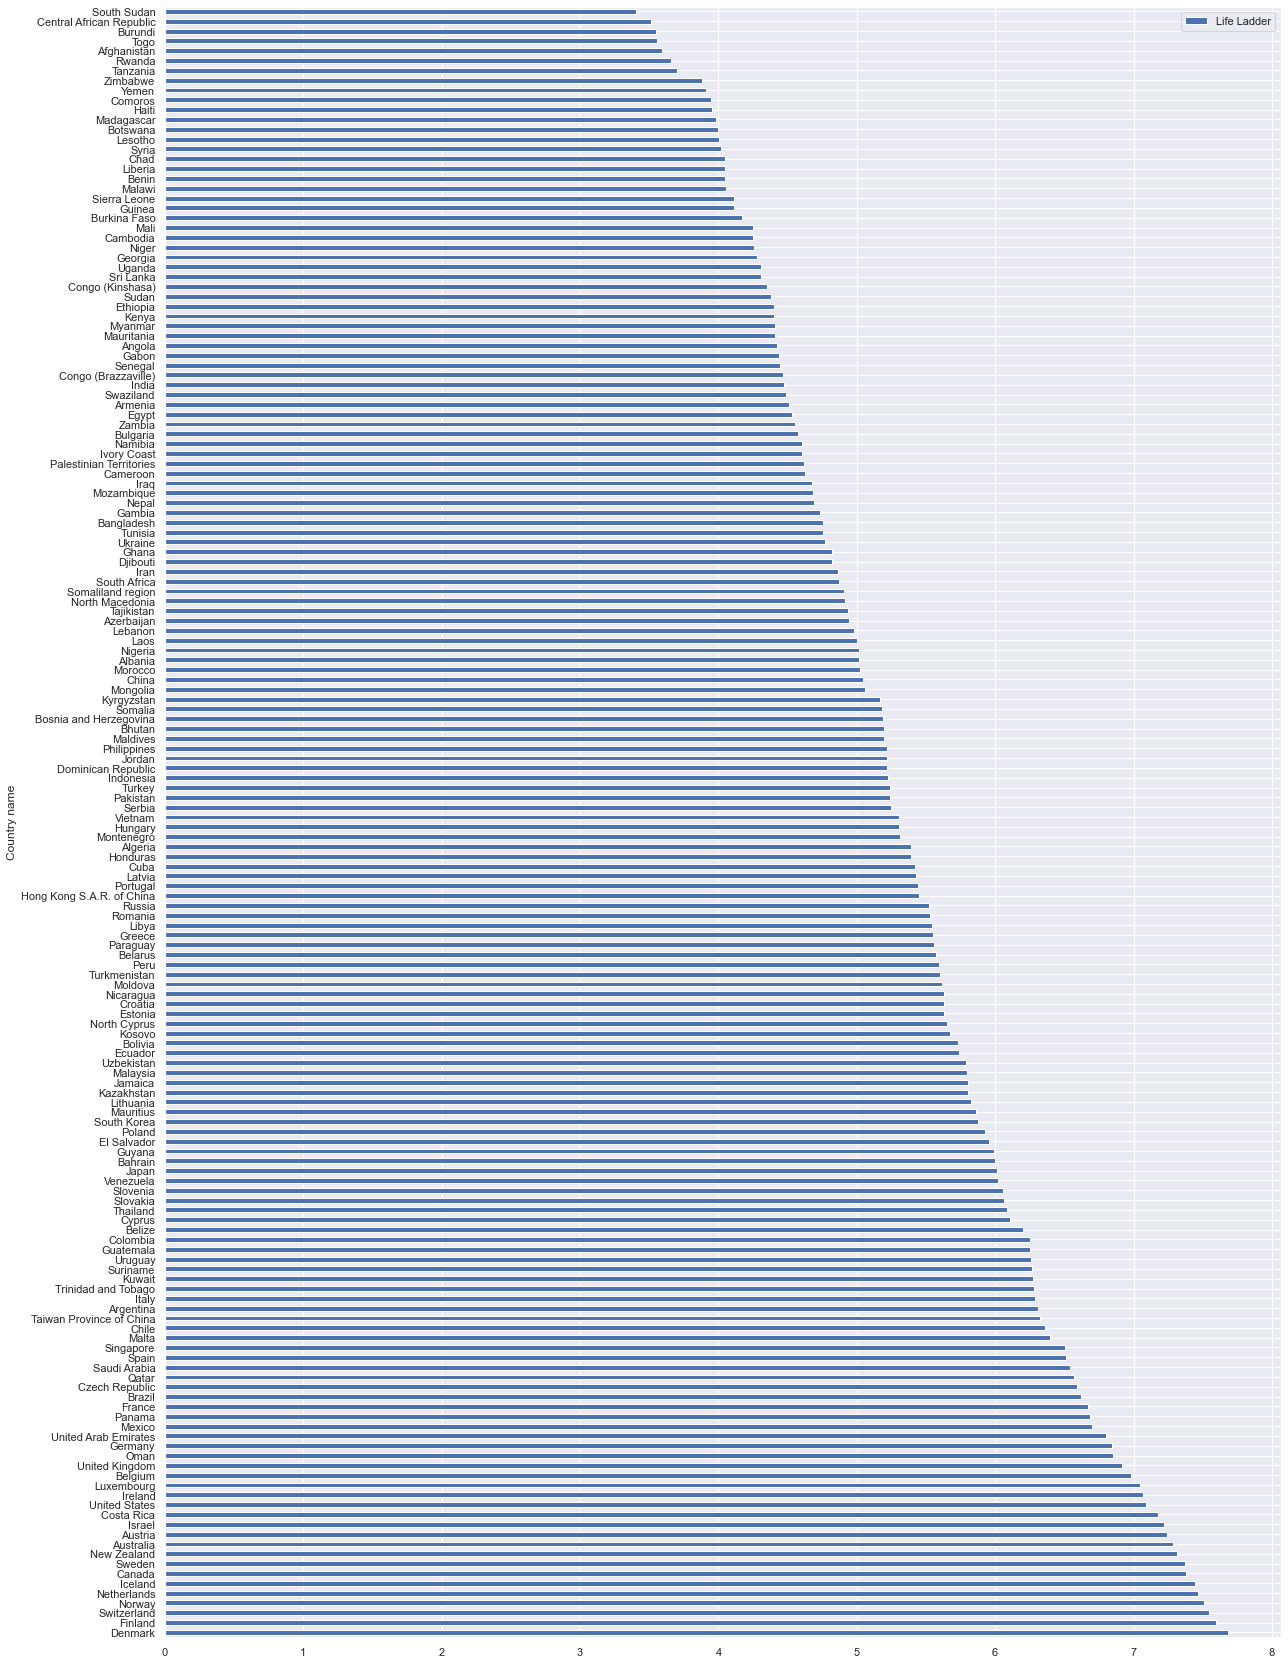

In [9]:
sns.set(rc={'figure.figsize':(20,30)})
happyoverall_df.plot.barh()

<AxesSubplot:xlabel='Life Ladder'>

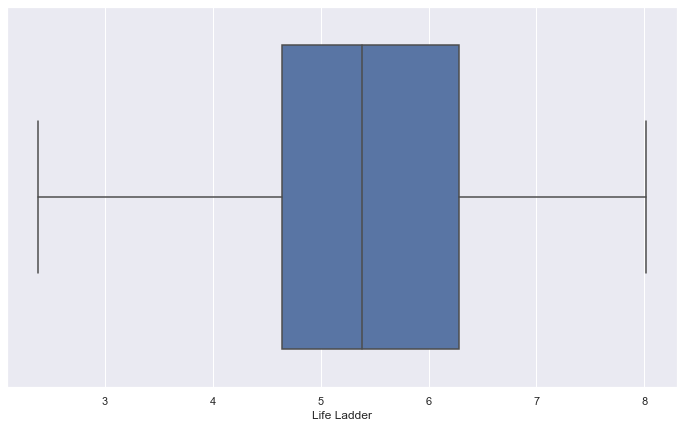

In [16]:
sns.set(rc={'figure.figsize':(12,7)})
sns.boxplot(x=happy_df["Life Ladder"])

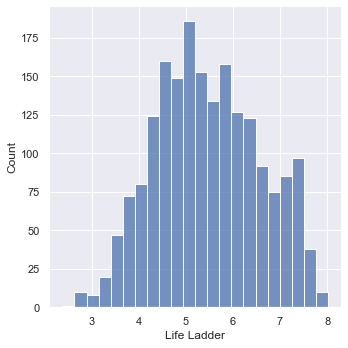

In [20]:
sns.displot(happy_df, x="Life Ladder")

Overall, the distribution of the life ladder is score is mostly even with the slight skew to the right. This indicates that more countries have low life ladder scores than high life ladder scores.

In [22]:
happy_df[["Life Ladder"]].describe()

,Life Ladder
count,1949.000000
mean,5.466705
std,1.115711
min,2.375000
25%,4.640000
50%,5.386000
75%,6.283000
max,8.019000


The mean is greater than the median, therefore it is positively skewed.

## World Map

In [37]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install -U mapclassify

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pycountry
import geopandas

Renaming the columns.

In [60]:
happy_df = happy_df.rename(columns = {"Country name":"Country"})
happy_df = happy_df.rename(columns = {"Life Ladder":"Life_Ladder"})

Adding country code to the existing life ladder table. The country code is needed to populate the world map with the life ladder indexes.

In [61]:
def addcode(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
happy_df['CODE']=addcode(happy_df.Country)
happy_df

,Country,year,Life_Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,CODE
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,AFG
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,AFG
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,AFG
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,AFG
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,ZWE
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,ZWE
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,ZWE
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,ZWE


Get the table with the country code and points.

In [62]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [63]:
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,happy_df,on='CODE')
merge

,pop_est,continent,name,CODE,gdp_md_est,geometry,Country,year,Life_Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2005,7.418,10.652,0.962,71.30,0.957,0.256,0.503,0.839,0.233
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2007,7.482,10.739,NaN,71.66,0.930,0.249,0.406,0.872,0.257
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2008,7.486,10.738,0.939,71.84,0.926,0.262,0.370,0.890,0.202
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2009,7.488,10.697,0.943,72.02,0.915,0.246,0.413,0.867,0.248
4,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2010,7.650,10.717,0.954,72.20,0.934,0.230,0.413,0.879,0.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2017,6.192,10.183,0.916,63.50,0.859,0.015,0.911,0.846,0.248
1632,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,2014,3.832,NaN,0.545,49.84,0.567,NaN,0.742,0.614,0.428
1633,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,2015,4.071,NaN,0.585,50.20,0.512,NaN,0.710,0.586,0.450
1634,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,2016,2.888,NaN,0.532,50.60,0.440,NaN,0.785,0.615,0.549


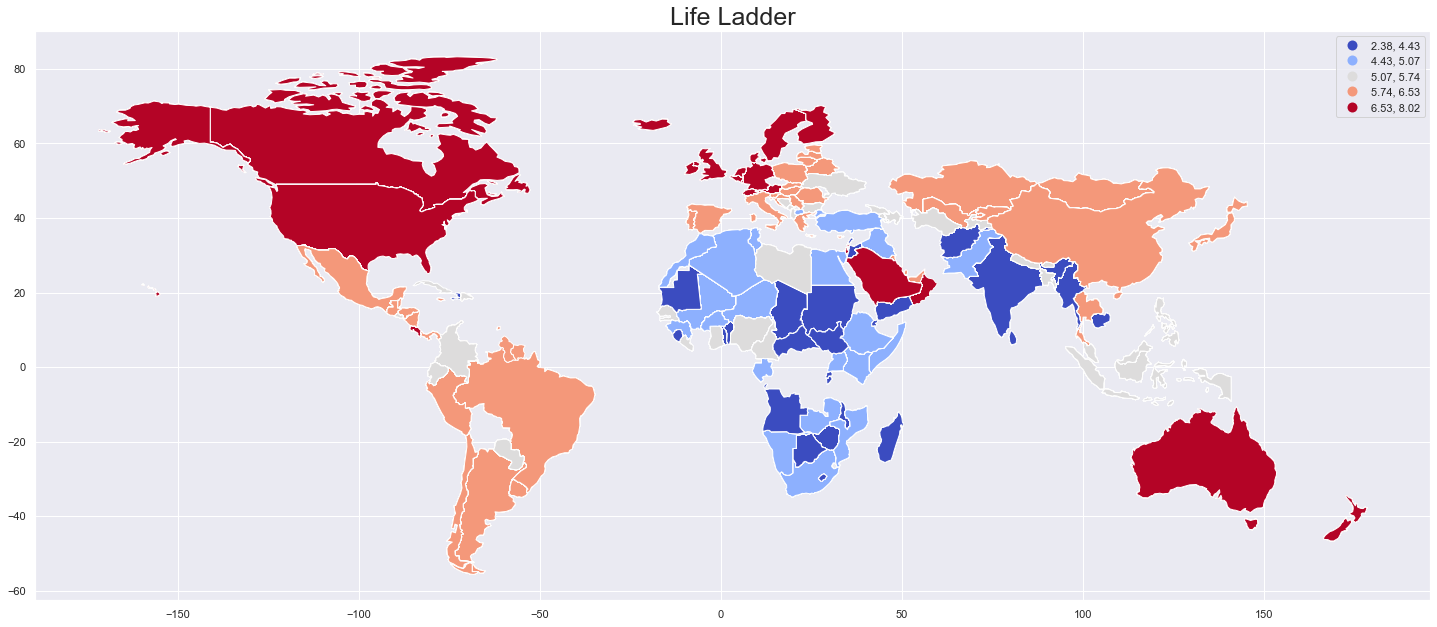

In [65]:
merge.plot(column='Life_Ladder', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Life Ladder',fontsize=25)
plt.show()

Countries in Africa seem to have a low life ladder where as countries with high number of caucasian's seem to have 
a high life ladder. 

## Top 4 Happy Countries

In [24]:
top4=happy_df.loc[(happy_df['Country name']=='Denmark')|(happy_df['Country name']=='Finland')|(happy_df['Country name']=='Norway')|(happy_df['Country name']=='Switzerland')]


Text(0.5, 1.0, 'TOP 4')

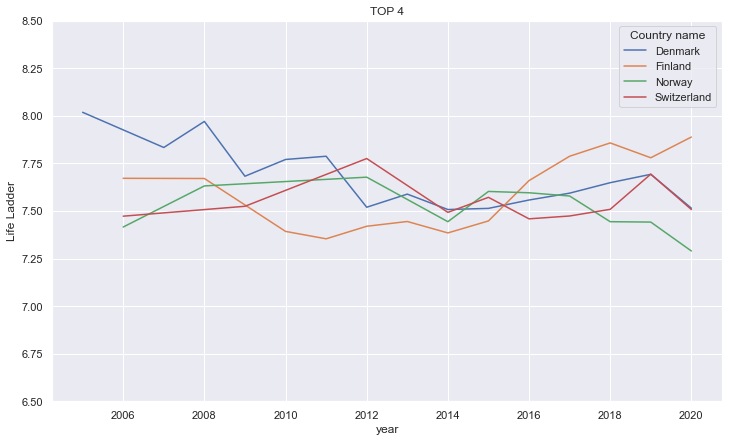

In [27]:
ax=sns.lineplot(data=top4, x="year", y="Life Ladder", hue="Country name")
ax.set(ylim=(6.5, 8.5))
ax.set_title('TOP 4')


The top 4 countries are all located in Europe and have had steady happiness index throughout the years. The steady GDP and increading life expectancy may potentially indicate that these countries give citizens a sense of security. 

In [30]:
top4.groupby(["Country name"])[["Country name", "Life Ladder","Log GDP per capita","Social support","Freedom to make life choices"]].var().sort_values('Life Ladder',ascending=False)

,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices
Country name,,,,
Finland,0.038389,0.000763,0.000152,0.000293
Denmark,0.027495,0.001453,0.000083,0.000212
Norway,0.014936,0.000193,0.000092,0.000037
Switzerland,0.011064,0.000870,0.000097,0.000274


The variance across all columns is very low. There hasn't been a lot change in these European countries.

## Bottom 4 Happy Countries

In [31]:
sad4=happy_df.loc[(happy_df['Country name']=='Togo')|(happy_df['Country name']=='Burundi')|(happy_df['Country name']=='South Sudan')|(happy_df['Country name']=='Central African Republic')]

Text(0.5, 1.0, 'Bottom 4')

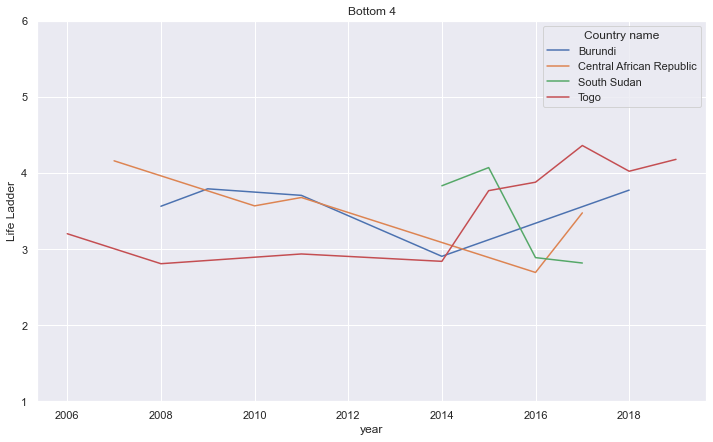

In [32]:
ax=sns.lineplot(data=sad4, x="year", y="Life Ladder", hue="Country name")
ax.set(ylim=(1, 6))
ax.set_title('Bottom 4')

The bottom 4 countries are all located in Africa. The top 4 sad countries have low life expectancy, low GDP, and high perceptions of corruption. Toga seems to have an increasing happiness index.

In [34]:
sad4.groupby(["Country name"])[["Country name", "Life Ladder","Log GDP per capita","Social support","Freedom to make life choices","Perceptions of corruption","Generosity"]].var().sort_values('Life Ladder',ascending=False)

,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Generosity
Country name,,,,,,
South Sudan,0.412961,NaN,0.000511,0.003338,0.001003,NaN
Togo,0.373352,0.014142,0.010469,0.019836,0.004390,0.002190
Central African Republic,0.280652,0.024046,0.010738,0.003687,0.001566,0.002721
Burundi,0.137426,0.003120,0.012677,0.019251,0.010767,0.000481


There is a higher variance in the bottom 4 countries compared to the top 4 countries. There is more change happening in the bottom 4 countries.

## Big Change

In [35]:
happychange_df=happy_df.groupby(["Country name"])[["Country name", "Life Ladder"]].var().sort_values('Life Ladder',ascending=False)
happychange_df

,Life Ladder
Country name,
Venezuela,1.132509
Syria,0.939017
Angola,0.664692
Benin,0.654360
Afghanistan,0.549060
...,...
Cuba,NaN
Guyana,NaN
Maldives,NaN


There has been a big change in happiness index in Venezuela and Syria throughout the years.

In [36]:
change=happy_df.loc[(happy_df['Country name']=='Venezuela')|(happy_df['Country name']=='Syria')]
change

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1662,Syria,2008,5.323,8.652,0.712,63.90,0.661,0.122,0.680,0.609,0.338
1663,Syria,2009,4.979,8.654,0.842,64.00,0.748,0.082,0.688,0.574,0.292
1664,Syria,2010,4.465,8.729,0.934,64.10,0.647,0.008,0.743,0.558,0.225
1665,Syria,2011,4.038,8.727,0.576,62.32,0.530,0.131,0.741,0.599,0.496
1666,Syria,2012,3.164,8.563,0.588,60.54,0.467,0.316,0.673,0.464,0.705
1667,Syria,2013,2.688,8.396,0.585,58.76,0.455,0.225,0.663,0.387,0.622
1668,Syria,2015,3.462,8.442,0.464,55.20,0.448,0.045,0.685,0.369,0.643
1879,Venezuela,2005,7.170,9.313,0.955,65.40,0.838,NaN,0.720,0.819,0.233
1880,Venezuela,2006,6.525,9.460,0.946,65.46,0.798,-0.031,0.646,0.859,0.178
1881,Venezuela,2008,6.258,9.701,0.922,65.58,0.678,-0.225,0.776,0.802,0.224


https://www.bloomberg.com/graphics/2019-venezuela-key-events/

https://www.bbc.com/news/world-middle-east-35806229

Venezuela decline is happiness index is due to it's economic fall. Venezuela’s economic fortunes have been closely linked to the price of oil. The economy had shrunk by more than 50 percent from 2013 to 2015. Annual inflation has surged into the hundreds of thousands of percent. In addition to the economy, since Chavez's death, there has been poltical turmoil and rigged elections.

Before the war, many Syrians were complaining about high unemployment, corruption and a lack of political freedom. A peaceful protest lead to a 10 year war. Violence and bombings have been escalating.

## Predict Life Ladder Index

#### Pearson Correlation

The Pearson correlation coefficient is a measure of linear correlation between two sets of data.<br>
The ratio between the covariance of two variables and the product of their standard deviations.

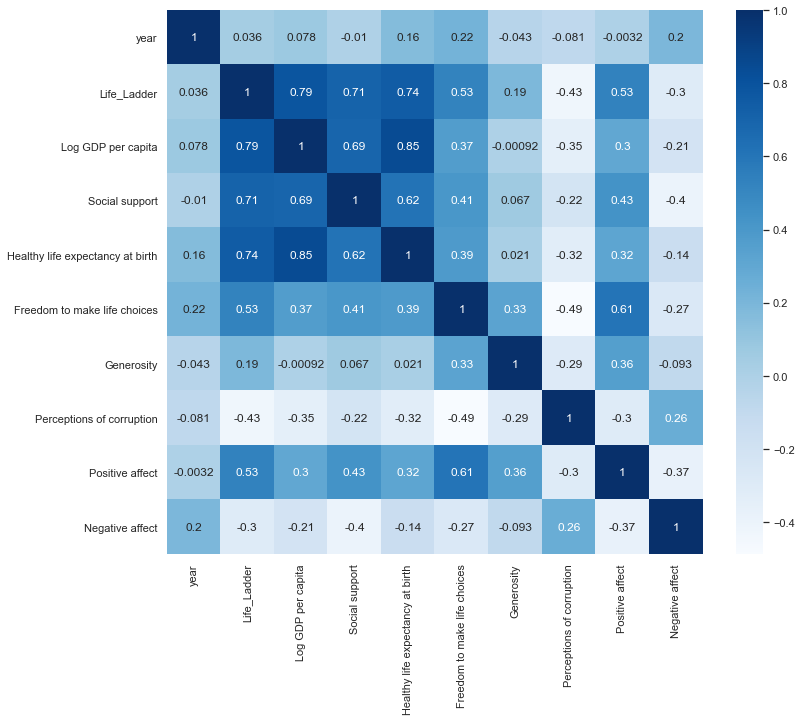

In [66]:
plt.figure(figsize=(12,10))
cor = happy_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

The correlation coefficient closer to 1 implies stronger positive correlation.<br>
Get features that have correlation coefficient greater than 0.5.

In [69]:
cor_target = abs(cor["Life_Ladder"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Life_Ladder                         1.000000
Log GDP per capita                  0.790166
Social support                      0.707806
Healthy life expectancy at birth    0.744506
Freedom to make life choices        0.528063
Positive affect                     0.532273
Name: Life_Ladder, dtype: float64

Log GDP per capita and Healthy life expectancy at birth have the highest correlation coefficent.

Should drop all the other columns without correlation.

Check if independent variables are uncorrelated with each other. 
If these variables are correlated with each other, then one of them should be dropped. 

FOCUS:Log GDP per capita,Social support,Healthy life expectancy at birth, and Positive affect

In [74]:
print(happy_df[["Log GDP per capita","Social support"]].corr())

                    Log GDP per capita  Social support
Log GDP per capita            1.000000        0.692602
Social support                0.692602        1.000000


In [75]:
print(happy_df[["Log GDP per capita","Healthy life expectancy at birth"]].corr())

                                  Log GDP per capita  \
Log GDP per capita                          1.000000   
Healthy life expectancy at birth            0.848049   

                                  Healthy life expectancy at birth  
Log GDP per capita                                        0.848049  
Healthy life expectancy at birth                          1.000000  


In [76]:
print(happy_df[["Social support","Healthy life expectancy at birth"]].corr())

                                  Social support  \
Social support                          1.000000   
Healthy life expectancy at birth        0.616037   

                                  Healthy life expectancy at birth  
Social support                                            0.616037  
Healthy life expectancy at birth                          1.000000  


In [77]:
print(happy_df[["Social support","Positive affect"]].corr())

                 Social support  Positive affect
Social support         1.000000         0.432152
Positive affect        0.432152         1.000000


In [78]:
print(happy_df[["Healthy life expectancy at birth","Positive affect"]].corr())

                                  Healthy life expectancy at birth  \
Healthy life expectancy at birth                          1.000000   
Positive affect                                           0.318247   

                                  Positive affect  
Healthy life expectancy at birth         0.318247  
Positive affect                          1.000000  


In [80]:
print(happy_df[["Log GDP per capita","Positive affect"]].corr())

                    Log GDP per capita  Positive affect
Log GDP per capita            1.000000         0.302282
Positive affect               0.302282         1.000000


After looking at correlation<br>
FOCUS:Log GDP per capita,Social support, and Positive affect

In [84]:
happy_numerical = happy_df.drop(labels=['Generosity','Perceptions of corruption','Negative affect','Freedom to make life choices','year','CODE','Country','Healthy life expectancy at birth'], axis=1)
happy_numerical

,Life_Ladder,Log GDP per capita,Social support,Positive affect
0,3.724,7.370,0.451,0.518
1,4.402,7.540,0.552,0.584
2,4.758,7.647,0.539,0.618
3,3.832,7.620,0.521,0.611
4,3.783,7.705,0.521,0.710
...,...,...,...,...
1944,3.735,7.984,0.768,0.738
1945,3.638,8.016,0.754,0.806
1946,3.616,8.049,0.775,0.710
1947,2.694,7.950,0.759,0.716


#### Linear Regression

In [85]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [88]:
happy_numerical=happy_numerical.dropna()

##### Before linear regression, let's visualize the linear behavior of the different factors.

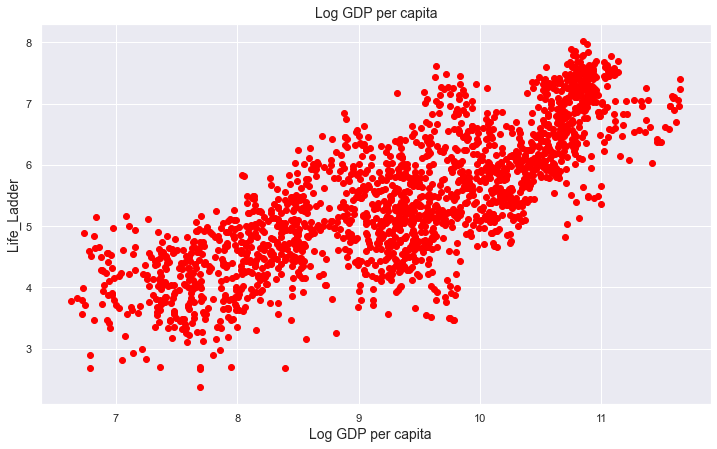

In [89]:
plt.scatter(happy_numerical['Log GDP per capita'], happy_numerical['Life_Ladder'], color='red')
plt.title('Log GDP per capita', fontsize=14)
plt.xlabel('Log GDP per capita   ', fontsize=14)
plt.ylabel('Life_Ladder', fontsize=14)
plt.grid(True)
plt.show()

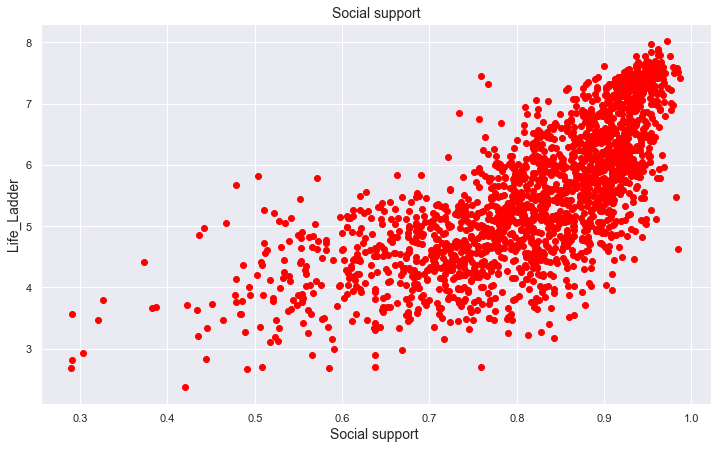

In [90]:
plt.scatter(happy_numerical['Social support'], happy_numerical['Life_Ladder'], color='red')
plt.title('Social support', fontsize=14)
plt.xlabel('Social support ', fontsize=14)
plt.ylabel('Life_Ladder', fontsize=14)
plt.grid(True)
plt.show()

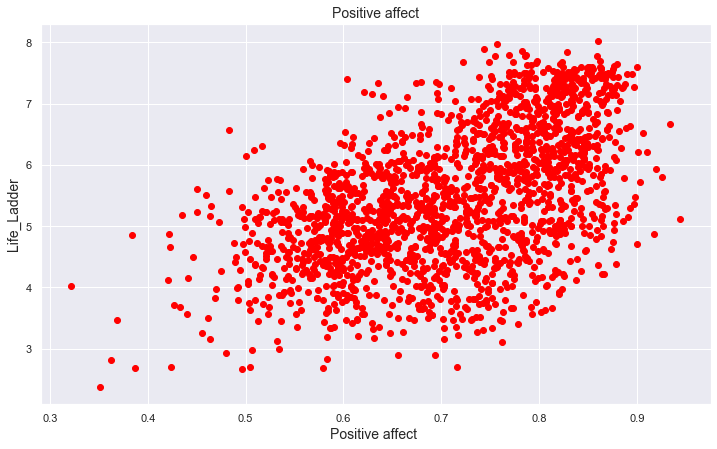

In [92]:
plt.scatter(happy_numerical['Positive affect'], happy_numerical['Life_Ladder'], color='red')
plt.title('Positive affect', fontsize=14)
plt.xlabel('Positive affect ', fontsize=14)
plt.ylabel('Life_Ladder', fontsize=14)
plt.grid(True)
plt.show()

##### Regression One Variable(GDP)

In [124]:
X = happy_numerical['Log GDP per capita'] 
Y = happy_numerical['Life_Ladder']

reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), Y)

LinearRegression()

In [125]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 -1.6970655808496096
Coefficients: 
 [0.76564774]


Let's predict a life ladder now that we have a linear equation.

In [126]:
happy_df.head(1)

,Country,year,Life_Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,CODE
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258,AFG


In [127]:
GDP = 7.37
print ('Life Ladder: \n', reg.predict([[GDP]]))

Life Ladder: 
 [3.94575824]


The life ladder is only off by +0.22

In [128]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Life_Ladder   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     3131.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:04:23   Log-Likelihood:                -1967.5
No. Observations:                1889   AIC:                             3939.
Df Residuals:                    1887   BIC:                             3950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6971      0

##### Regression Multiple Variable(GDP,Social Support,Positive affect)

In [131]:
X = happy_numerical[['Log GDP per capita','Social support','Positive affect']] 
Y = happy_numerical['Life_Ladder']
 
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [132]:
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 -3.25795515811011
Coefficients: 
 [0.55686312 1.8100851  2.87695096]


In [135]:
happy_df.head(1)

,Country,year,Life_Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,CODE
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258,AFG


In [136]:
GDP = 7.37
Social_Support = 0.451
Positive_Affect=0.518
print ('Life Ladder: \n', lr.predict([[GDP,Social_Support,Positive_Affect]]))

Life Ladder: 
 [3.15273503]


The life ladder is off by +0.57. 

In [137]:
import statsmodels.api as sm

In [138]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Life_Ladder   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1752.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:10:20   Log-Likelihood:                -1633.4
No. Observations:                1889   AIC:                             3275.
Df Residuals:                    1885   BIC:                             3297.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2580      0

## Future Steps